# Trình bày kết quả giản lược cấu trúc dữ liệu UMAP

### BS. Lê Ngọc Khả Nhi


# Mục tiêu bài thực hành

Uniform Manifold Approximation and Projection (UMAP) là một kỹ thuật giản lược cấu trúc dữ liệu hiện đại do L.McInnes và J.Healy thiết kế vào năm 2018. Các bạn có thể ứng dụng kỹ thuật này trong Python qua thư viện umap: https://github.com/lmcinnes/umap

Trong bài thực hành này, Nhi sẽ giới thiệu một số kỹ thuật đồ họa để trình bày trực quan kết quả UMAP trong không gian Euclide 2-3 chiều và không gian phi Euclide.

# Thăm dò dữ liệu bằng UMAP

Đầu tiên, Nhi đặt ra một tình huống tiêu biểu mà ta có thể áp dụng kỹ thuật UMAP; đó là khi ta tiếp cận một bộ dữ liệu cho một bài toán Machine learning gồm rất nhiều features, nhiều đến mức ta không thể khảo sát trực tiếp bằng những kỹ thuật data visualizatuon thông thường.
Để minh họa, Nhi sử dụng bộ dữ liệu MNIST thời trang gồm 784 features là mật độ pixel trong những tấm ảnh đơn sắc 28x28, 10 nhãn kết quả, mỗi nhãn gồm 7000 instance

In [106]:
import umap
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('https://www.openml.org/data/get_csv/18238735/phpnBqZGZ.csv')

df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
69996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,1
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [85]:
df.shape

(70000, 785)

Giả sử ta chia riêng 70% dữ liệu để dựng mô hình multiclass classification, và muốn thăm dò dữ liệu này

In [4]:
X = df.iloc[:,:-1].values
Y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [48]:
y_train.value_counts()

6    4998
1    4930
8    4927
2    4924
4    4905
7    4903
3    4901
9    4873
0    4825
5    4814
Name: class, dtype: int64

In [62]:
X_train.shape

(49000, 784)

Trước khi dựng mô hình classification, ta muốn có một khái niệm về mức độ khó khăn của bài toán, bằng cách giản lược tối đa số chiều (dimensionality) dữ liệu nhưng vẫn bảo toàn được phần lớn thông tin, và quan sát kết quả này bằng đồ họa. UMAP rất hữu dụng cho mục tiêu này. 

Khi áp dụng UMAP, ta có thể giản lược cấu trúc dữ liệu từ 784 chiều (features) xuống chỉ còn 3, thậm chí 2 chiều. 

# Trình bày đồ họa

Tuy nhiên, bước tiếp theo quan trọng không kém, đó là làm cách nào biểu diễn kết quả này để có một quan sát tối ưu phân bố của các nhãn kết quả.

## Tạo phổ màu cho 10 nhãn kết quả

Đầu tiên, chúng ta chuẩn bị một phổ màu col_map gồm 10 giá trị không liên tục để dùng biểu thị cho 10 nhãn kết quả. Phổ màu này sẽ được dùng trong suốt bài thực hành

In [60]:
col_dict = {1:'#7bc90c',
            2:'#ffb700',
            3:'#f5072f',
            4:'#d109e3',
            5: "#009dff",
            6: "#10ccb6",
            7: "#6484f5",
            8: "#ab0e3a",
            9: "#bd9e15",
            0: 'grey',
           }

class_set = y_train.unique()

pals = [col_dict[cl] for cl in class_set]

# List of RGB triplets
rgb_values = sns.color_palette(pals, 10)

# Map label to RGB
color_map = dict(zip(class_set, rgb_values))

# Không gian Euclide

## Tọa độ Cartesian 2 chiều

Đầu tiên, ta dùng thức đơn giản nhất, đó là một biểu đồ tán xạ trên hệ trục tọa độ Descartes để biểu diễn 2 chiều thông tin là 2 vector kết quả UMAP, và phổ màu cho chiều thông tin thứ 3, là nhãn kết quả.

Hàm fit_transform giảm 784 chiều xuống còn 2 chiều, kết quả xuất ra là 1 array 2D, ta dùng hàm scatterplot của seaborn để vẽ biểu đồ.

In [87]:
mapper = umap.UMAP(random_state=123).fit_transform(X_train)

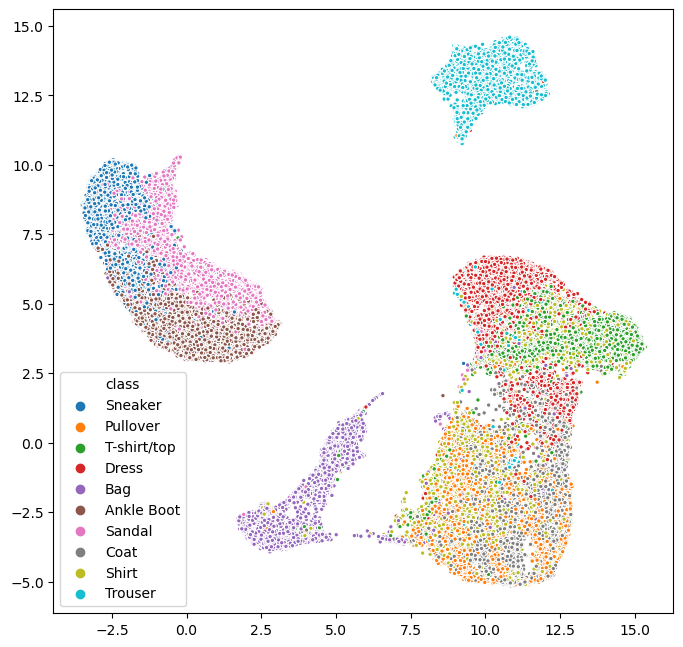

In [97]:
plt.figure(figsize=(8,8), dpi = 100)

sns.scatterplot(mapper[:,0],mapper[:,1], 
                hue = y_train.map({
        0:'T-shirt/top',
        1:'Trouser',
        2:'Pullover',
        3:'Dress',
        4:'Coat',
        5:'Sandal',
        6:'Shirt',
        7:'Sneaker',
        8:'Bag',
        9:'Ankle Boot',
    }), 
                s=10,
               cmap = color_map)

Cũng có thể vẽ trực tiếp bằng matplotlib

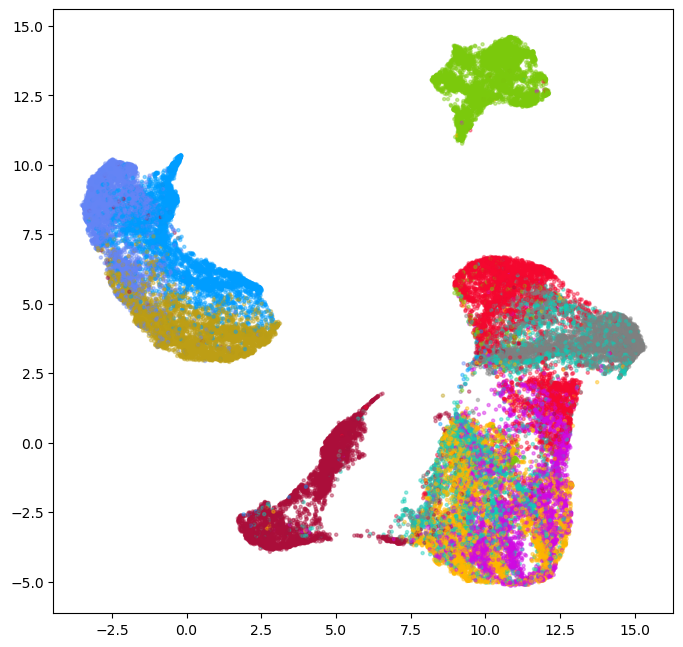

In [96]:
plt.figure(figsize=(8,8), dpi = 100)

plt.scatter(mapper[:,0],
            mapper[:,1], 
            c=y_train.map(color_map), 
            alpha = 0.4, 
            s=5)

## Tọa độ cực (polar)

Ta cũng có thể dùng hệ tọa độ cực (polar) thay vì Descartes, hình ảnh 2 components của UMAp sẽ bị biến dạng như sau:

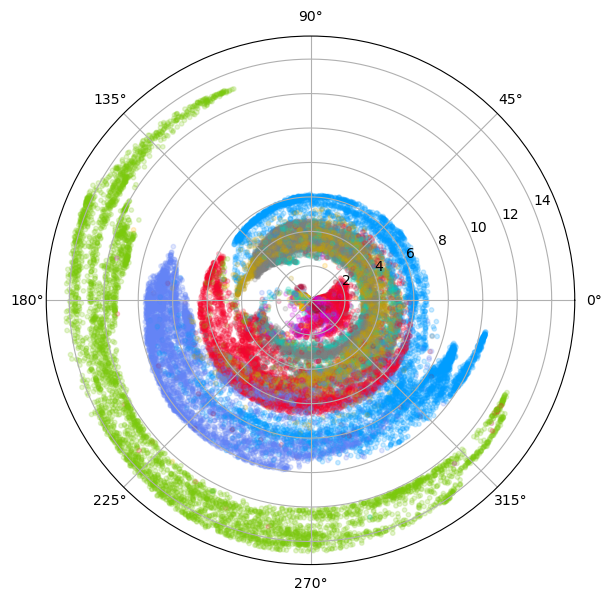

In [118]:
x = mapper[:,0]
y = mapper[:,1]

fig = plt.figure(figsize=(7,7), dpi = 100)
ax = fig.add_subplot(111, projection='polar')

ax.scatter(x,y, 
           c=y_train.map(color_map), 
           alpha = 0.2, 
           s=10)

## Tọa độ Cartesian 3 chiều

Ta có thể thay đổi argument n_components để UMAP tạo ra 3 chiều thông tin thay vì 2, lúc này ta có thể trình bày 3 chiều dữ liệu này trong hệ tọa độ không gian 3 chiều như sau:

In [64]:
mapper_3D = umap.UMAP(random_state=123,
                      n_components=3).fit_transform(X_train)

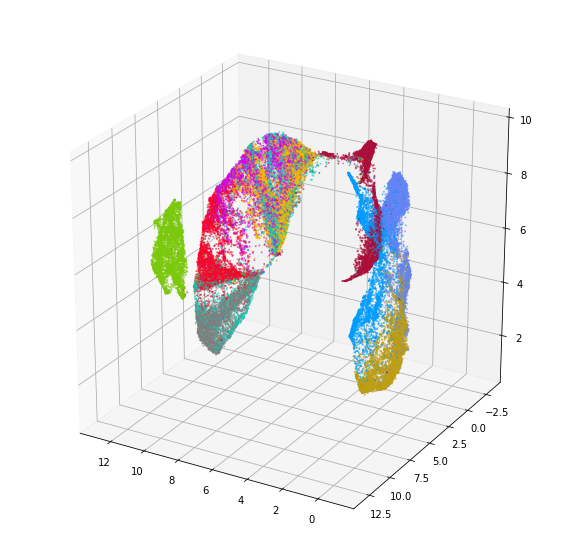

In [86]:
x= mapper_3D[:,0]
y= mapper_3D[:,1]
z= mapper_3D[:,2]

xyz = np.vstack([x,y,z])
xy = np.vstack([x,y])

plt.rcParams.update({'font.size': 10})
fig = plt.figure(figsize= (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=1, c = y_train.map(color_map), alpha = 0.5)

ax.view_init(25,120)

# Chiếu kết quả lên mặt cầu

Bây giờ ta thử làm một vài thứ "fancy" hơn, thí dụ, cũng với 2 component kết quả từ UMAP, ta có thể hoán chuyển để chiếu kết quả này lên một mặt cầu như sau:

In [5]:
sphere_mapper = umap.UMAP(output_metric='haversine', 
                          random_state=123).fit(X_train)

x = np.sin(sphere_mapper.embedding_[:, 0]) * np.cos(sphere_mapper.embedding_[:, 1])
y = np.sin(sphere_mapper.embedding_[:, 0]) * np.sin(sphere_mapper.embedding_[:, 1])
z = np.cos(sphere_mapper.embedding_[:, 0])

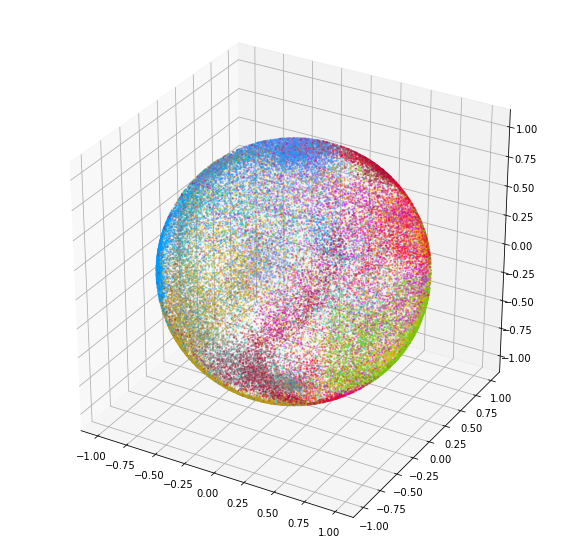

In [10]:
xyz = np.vstack([x,y,z])
xy = np.vstack([x,y])

plt.rcParams.update({'font.size': 10})
fig = plt.figure(figsize= (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=1, c = y_train.map(color_map), alpha = 0.3)

plt.show()

# Biểu diễn kết quả trong không gian hình xuyến

Ngoài mặt cầu, ta có thể hoán chuyển và chiếu kết quả theo hình xuyến:

In [12]:
import numba

@numba.njit(fastmath=True)
def torus_euclidean_grad(x, y, torus_dimensions=(2*np.pi,2*np.pi)):
    """Standard euclidean distance.

    ..math::
        D(x, y) = \sqrt{\sum_i (x_i - y_i)^2}
    """
    distance_sqr = 0.0
    g = np.zeros_like(x)
    for i in range(x.shape[0]):
        a = abs(x[i] - y[i])
        if 2*a < torus_dimensions[i]:
            distance_sqr += a ** 2
            g[i] = (x[i] - y[i])
        else:
            distance_sqr += (torus_dimensions[i]-a) ** 2
            g[i] = (x[i] - y[i]) * (a - torus_dimensions[i]) / a
    distance = np.sqrt(distance_sqr)
    return distance, g/(1e-6 + distance)

torus_mapper = umap.UMAP(output_metric=torus_euclidean_grad, 
                         random_state=123).fit(X_train)

R = 3 # Size of the doughnut circle
r = 1 # Size of the doughnut cross-section

x = (R + r * np.cos(torus_mapper.embedding_[:, 0])) * np.cos(torus_mapper.embedding_[:, 1])
y = (R + r * np.cos(torus_mapper.embedding_[:, 0])) * np.sin(torus_mapper.embedding_[:, 1])
z = r * np.sin(torus_mapper.embedding_[:, 0])

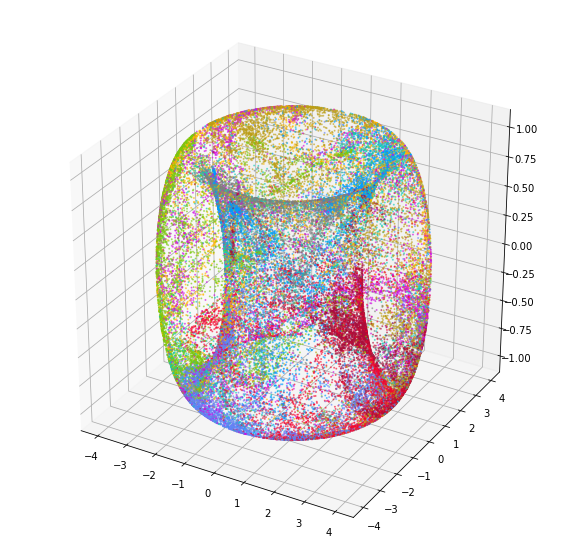

In [15]:
xyz = np.vstack([x,y,z])
xy = np.vstack([x,y])

plt.rcParams.update({'font.size': 10})
fig = plt.figure(figsize= (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=1, c = y_train.map(color_map), alpha = 0.5)

plt.show()

# Không gian Hyperbol

Kết quả UMAP (2 components) có thể chiếu lên không gian hyperbol để cho ra hình ảnh như sau:

In [16]:
hyperbolic_mapper = umap.UMAP(output_metric='hyperboloid',
                              random_state=123).fit(X_train)

x = hyperbolic_mapper.embedding_[:, 0]
y = hyperbolic_mapper.embedding_[:, 1]
z = np.sqrt(1 + np.sum(hyperbolic_mapper.embedding_**2, axis=1))

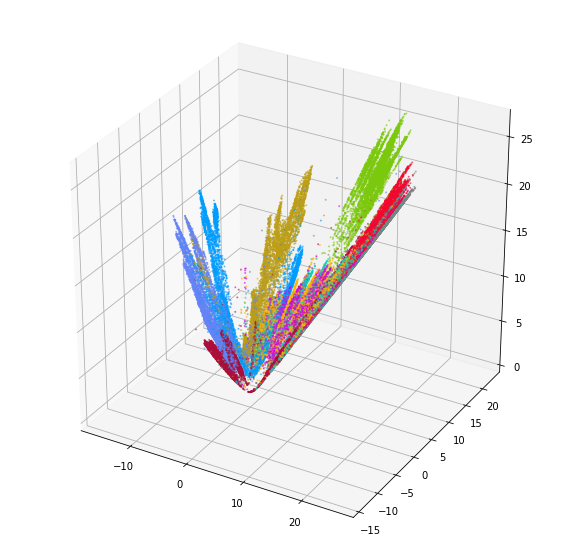

In [56]:
xyz = np.vstack([x,y,z])
xy = np.vstack([x,y])

plt.rcParams.update({'font.size': 10})
fig = plt.figure(figsize= (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=1, c = y_train.map(color_map), alpha = 0.5)

# Chiếu kết quả lên đĩa Poincaré

Từ kết quả hyperbol ở trên, ta có thể chiếu hình ảnh các cluster lên một mặt phẳng hình tròn (Poincaré disk), để có góc nhìn 2 chiều về phân bố các clusters từ phí đáy của hyperbol.

(-1.0169167995452881,
 1.0496846914291382,
 -1.0100834995508194,
 1.039324524998665)

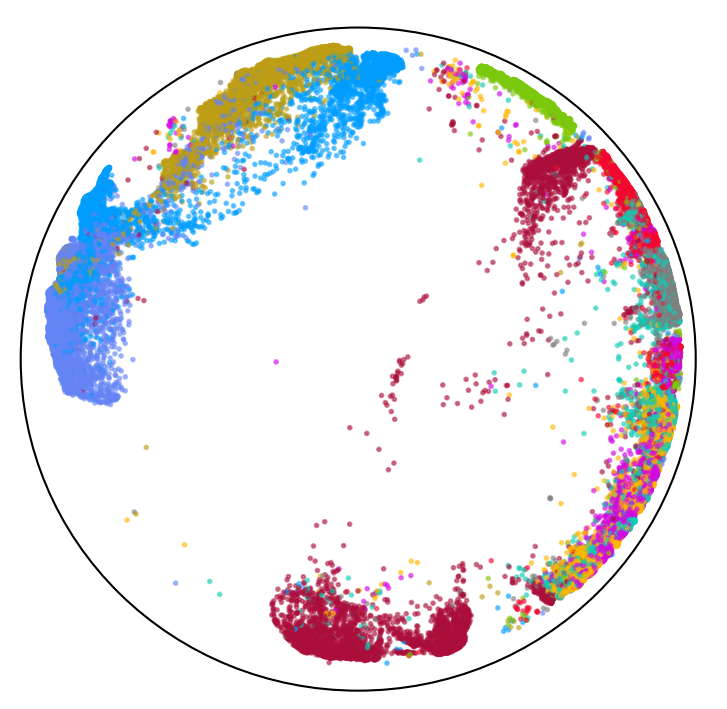

In [58]:
disk_x = x / (1 + z)
disk_y = y / (1 + z)

fig = plt.figure(figsize= (6,6), dpi = 150)
ax = fig.add_subplot(111)
ax.scatter(disk_x, disk_y, c = y_train.map(color_map), alpha = 0.5, s = 3)
boundary = plt.Circle((0,0.), 1, fc='none', ec='k')
ax.add_artist(boundary)
ax.axis('off')

# Kết luận

UMAP là một giải pháp hữu ích để thăm dò dữ liệu trong một thí nghiệm Machine learning với cấu trúc gồm rất nhiều features. Kết quả của UMAP có thể được trình bày dưới nhiều hình thức khác nhau. Các bạn có thể tùy chọn hình thức nào mang lại hiệu quả thị giác tối ưu. Những hình ảnh này chỉ cho ta khái niệm sơ lược về độ phức tạp của bài toán.